In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

0        10.117172
1       586.164759
2       574.993655
3       572.042828
4       566.141172
           ...    
1428     86.456759
1429     86.342000
1430     86.319448
1431     86.170207
1432     90.578069
Name: Whp_psig, Length: 1433, dtype: float64


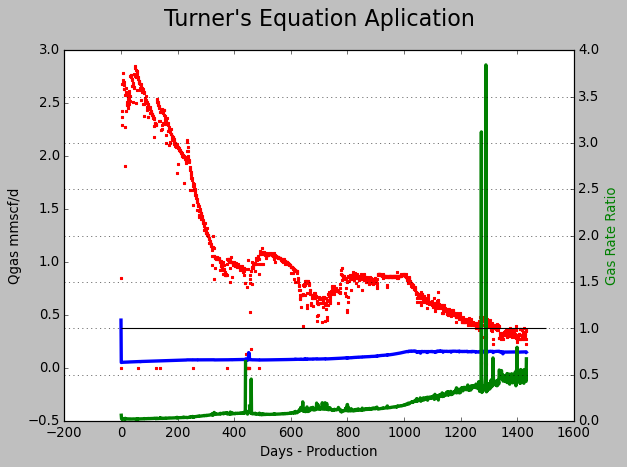

In [2]:
#Importing the gasflow file

filepath = r"C:\Users\lanci\OneDrive\Desktop\Trainning Dta\gasflow.txt"
df = pd.read_csv(filepath, sep="\t")
#Converting the whp from psi to bar
#single column print out
print( df["Whp_psig"] / 14.5 ) #  psig to bar  dev /14.5
#Calculating Vc in ft/sec
prm = 0.0031 * df["Whp_psig"] #prm = parameter
Vc=( 5.62 * (67 - prm)**0.25 ) / ( prm**0.5 )  #Vc =critical velocity or terminal velocity
#Historical data plotting..
plt.style.use("classic")
plt.figure(figsize=(8,6))
plt.scatter( df["Days"],  df["Qgas_mmscf"] , 
            color= "red", marker= "s", s= 6, label="Historical Data")
plt.xlabel("Days - Production", size =12)
plt.ylabel("Qgas mmscf/d", size =12)
plt.title("Turner's Equation Aplication", size= 20, pad= 22)

#Calculating Critical flow rate
# Q = V. A # Velocity*Area

#area = pi * (radian)**2
casing_id = 6.36 #inches
rd = 3.18 #inch #radian
area = 31.7 # from inch square to ft square
area = 0.22  #ft square 
critical_flow_rate = area * Vc* 86400/1000000 # the outcome is in units of scf/sec 86400 -> scf/day  --> mmscf/day

plt.plot(df["Days"], critical_flow_rate, color="blue", lw=3, label="Critical Rate")


#Velocity ratio or flow rate ratio Vr,Qr
# Vr = critical flow rate / historical flow rate 
q_ratio = critical_flow_rate / df["Qgas_mmscf"] # the result of q_ratio will be btw (0 & 1)

ratio_ax = plt.twinx()

ratio_ax.plot(df["Days"], q_ratio, color="green", lw=3)
ratio_ax.set_ylabel("Gas Rate Ratio", color="green")
ratio_ax.hlines(1, 0, 1500, color="black")
#plt.xlim(400, 500)


#plt.legend()
plt.tight_layout()
plt.grid()
plt.show()